#Clusterização com Kmeans: mall customers

## Importação das bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer

#seed
seed = 0
np.random.seed(seed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Carregar base de dados

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col=0)
df.head()

,Genre,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Vamos trabalhar com duas dimensões para fazer análises gráficas

In [3]:
df = df.loc[:,'AnnualIncome':'SpendingScore']
df.head()

,AnnualIncome,SpendingScore
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


##Visualizar base

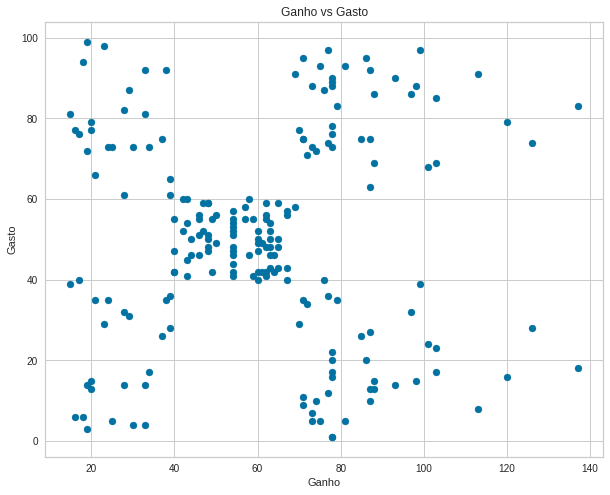

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['AnnualIncome'], y=df['SpendingScore'])
plt.title('Ganho vs Gasto')
plt.ylabel('Gasto')
plt.xlabel('Ganho')
plt.show()

##Rodar o Kmeans

In [5]:
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans = kmeans.fit(df)

In [6]:
# Grupos de cada registro da base
kmeans.labels_


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [7]:
# Centróides: muito importante analisar.
# Eles nos dizem sobre o perfil de cada grupo
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [48.26      , 56.48      ]])

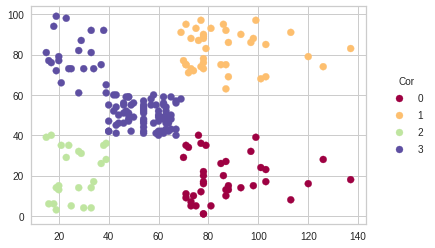

In [8]:
# Gráfico da separação dos grupos formados
fig = plt.scatter(x=df['AnnualIncome'], y=df['SpendingScore'], c=kmeans.labels_, cmap='Spectral')
handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.show()

##WCSS
- Métrica para avaliação do método do cotovelo. O ponto visto como um 'cotovelo' indica o número ótimo de clusters

##Davies Bouldin
- métrica para avaliar o número ótimo de clusters também! Mede a similaridade entre cada cluster e seu cluster mais próximo. A similaridade é dada pela razão entre a distância intra-cluster e a distância entre cluster. Portanto, clusters mais distantes e menos dispersos terão um score melhor.
O valor mínimo pe zero e quanto menor o score, melhor!

In [9]:
wcss = []
davies_bouldin = []
K = range(2,10)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=seed)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
  davies_bouldin.append(davies_bouldin_score(df, kmeans.labels_))

##Método do Cotovelo

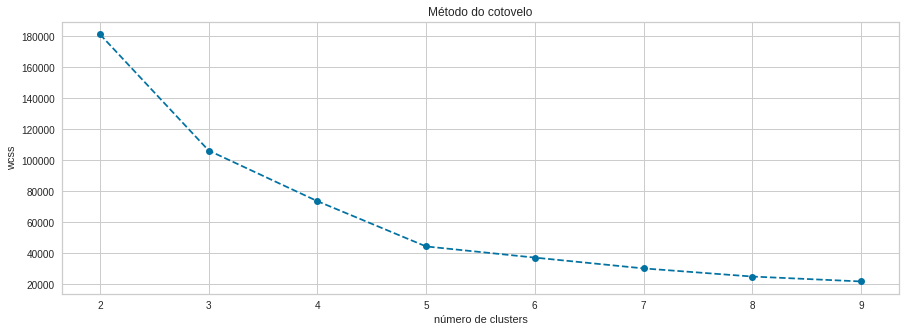

In [10]:
plt.figure(figsize= (15, 5))
plt.plot(K, wcss, 'bo--')
plt.xlabel('número de clusters')
plt.ylabel('wcss')
plt.title('Método do cotovelo')
plt.show()

##Davies Bouldin

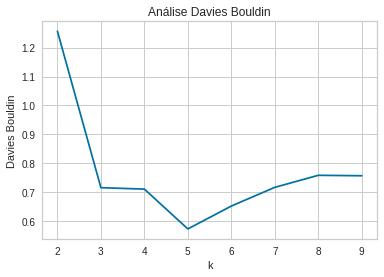

In [11]:
plt.plot(K,davies_bouldin)
plt.ylabel('Davies Bouldin')
plt.xlabel('k')
plt.title('Análise Davies Bouldin')
plt.show()

## Outra forma de visualizar o método do cotovelo

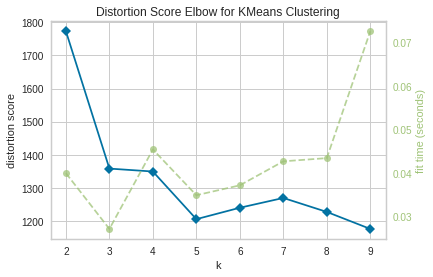

In [12]:
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df) 
visualizer.poof()

##Criação do modelo para o número ótimo de clusters

In [13]:
kmeans = KMeans(n_clusters=5, random_state=seed)
kmeans = kmeans.fit(df)

In [14]:
# Centróides: muito importante analisar.
# Eles nos dizem sobre o perfil de cada grupo
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [15]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{0: 81, 1: 22, 2: 39, 3: 23, 4: 35}


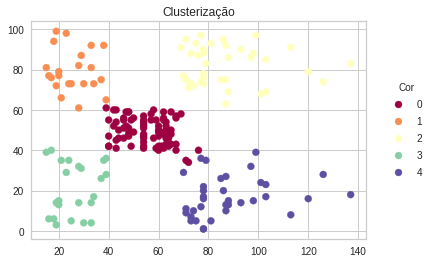

In [16]:
fig = plt.scatter(x=df['AnnualIncome'], y=df['SpendingScore'], c=kmeans.labels_, cmap='Spectral')

handles, labels = fig.legend_elements(prop="colors")
plt.legend(handles, labels, loc='center right', bbox_to_anchor=(1.2, 0.5), title='Cor')
plt.title('Clusterização')
plt.show()